# 2. Practical Part

## 1. Ridge Regression

We implement ridge regression as `regression_gradient`, a function of a `gradDescent` class:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
np.random.seed(5)


class gradDescent():
    def __init__(self, weightedDecay = 0.01, stepSize = 0.01, numberSteps = 4000):
        self.weightedDecay = weightedDecay
        self.stepSize = stepSize
        self.numberSteps = numberSteps

    def regression_gradient(self, weight, bias, data, target):
        '''
        bias: 1d scalar
        weightedDecay: λ
        stepSize: η
        x: data
        t: target
        
        '''
        #print('targets:', target)
        for i in range(0, self.numberSteps):
            # Stochastic gradient descent - choose one datapoint randomly
            index = np.random.randint(0, data.shape[0])
            
            # Calculate gradients
            if np.size(data[index]) == 1: # If data is 1D, just multiply
                grad =2*(weight * data[index]  + bias - target[index]) * data[index]
                biasGrad = 2*(weight * data[index] + bias - target[index])
            else: # Otherwise, we need the explicit dot product
                grad = 2 * np.dot((np.dot(weight, data[index]) + bias - target[index]), data[index])
                biasGrad = 2*(np.dot(weight, data[index]) + bias - target[index])
                
            # Do regularization
            weightGrad = 2 * self.weightedDecay * weight
            regGrad = weightGrad + grad
                
            # Update parameters  
            bias = bias - self.stepSize*biasGrad
            weight = weight - self.stepSize*regGrad

        #print('w:',  weight, 'b:', bias)
        return weight, bias  

## 2. Draw Dn from h(x)

We define our target function $h(x)$, and then draw a dataset $D_{n}$ from it:

In [2]:
def hX(x):
    '''
    defines the target function
    '''
    return np.sin(x) + 0.3*x -1

data = np.random.uniform(-5,5,15)
target = hX(data)
dataDn = [data, target]

##  3. Train without regularization, $\lambda$ = 0
We plot h(x), Dn, and our prediction function $f(X) = w^T X + b $ in the following part.

## 4. Part 3 revisited, with different $\lambda$ values
We extend the original plot to also plot predictions with $W$ regularized by $\lambda$ $\lVert w \rVert^2$, choosing an intermediate and large value for $\lambda$.

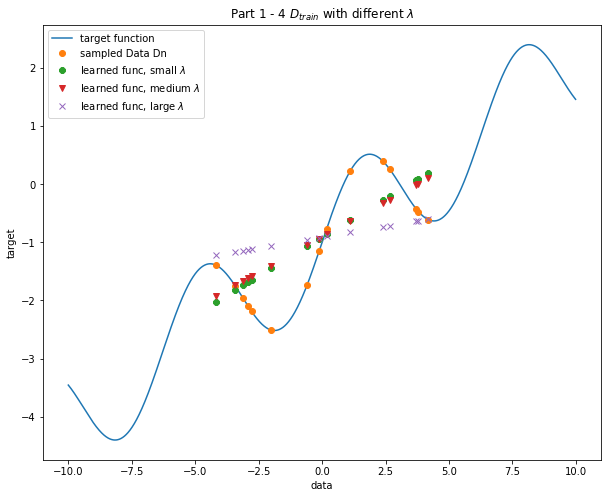

In [3]:
#initialize weights
weight = np.random.rand(1)
bias = 0

#param holders
regGDsmallParam = []
regGDMedParam = []
regGDLargeParam = []

#Small lambda
weight = np.random.rand(1)
bias = 0
regGDsmall = gradDescent(weightedDecay = 0.01, stepSize = 0.00025)
regGDsmallParam = regGDsmall.regression_gradient(weight, bias, dataDn[0], dataDn[1])

# Medium lambda
weight = np.random.rand(1)
bias = 0
regGDMed = gradDescent(weightedDecay = 1, stepSize = 0.00025)
regGDMedParam = regGDMed.regression_gradient(weight, bias, dataDn[0], dataDn[1])

# Large lambda
weight = np.random.rand(1)
bias = 0
regGDLarge = gradDescent(weightedDecay = 20, stepSize = 0.00025)
regGDLargeParam = regGDLarge.regression_gradient(weight, bias, dataDn[0], dataDn[1])

# Use the learned parameters to define a linear function
learnedFuncSmall = (regGDsmallParam[0] * dataDn[0]) + regGDsmallParam[1]
learnedFuncMed = (regGDMedParam[0] * dataDn[0]) + regGDMedParam[1]
learnedFuncLarge = (regGDLargeParam[0] * dataDn[0]) + regGDLargeParam[1]

# Then plot the functions
xvals = np.arange(-10, 10, 0.01)
plt.rcParams['figure.figsize'] = [10, 8]

plt.plot(xvals, hX(xvals), label = "target function")
plt.plot(dataDn[0], target, 'o', label="sampled Data Dn")
plt.plot(dataDn[0], learnedFuncSmall, '8', label = "learned func, small $\lambda$")
plt.plot(dataDn[0], learnedFuncMed, 'v', label = "learned func, medium $\lambda$")
plt.plot(dataDn[0], learnedFuncLarge, 'x', label = "learned func, large $\lambda$")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Part 1 - 4 $D_{train}$ with different $\lambda$")
plt.legend(loc='best')
plt.show()


## 5. Sample $D_{test}$ from $h(X)$

We sample our test set $D_{test}$ and train models on $D_{n}$ , using $\lambda$ = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100].

Then we plot $\lambda$  on the x-axis, and loss on the y-axis (N.B. to TAs: we plotted $\lambda$ on a log scale):

In [4]:
# Sample D_test
data = np.random.uniform(-5, 5, 100)
target = hX(data)
dataDtest = [data, target]

lambdaVals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
weight = np.random.rand(1)
bias = 0

lossArr = []

# Do GD for each lambda value and plot
for i in lambdaVals:
    regGD = gradDescent(weightedDecay = i, stepSize = 0.00025)
    regGDParam = regGD.regression_gradient(weight, bias, dataDn[0], dataDn[1])
    
    xvals = np.arange(-10, 10, 0.01)
    learnedFunc = (regGDParam[0] * dataDtest[0]) + regGDParam[1]
    
    # Calculate loss
    loss = np.mean((learnedFunc - dataDtest[1])**2)
    lossArr.append(loss)
    
    # Uncomment to plot
    """plt.rcParams['figure.figsize'] = [10, 8]
    plt.plot(dataDtest[0], learnedFunc, '8', label = "learned func, $\lambda$ = {}".format(i) )    

plt.plot(dataDtest[0], dataDtest[1], 'o', label="sampled Data $D_{test}$")
plt.plot(xvals, hX(xvals), label = "target function")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Part 5 $D_{test}$ with different $\lambda$")
plt.legend(loc='best')
plt.show()"""

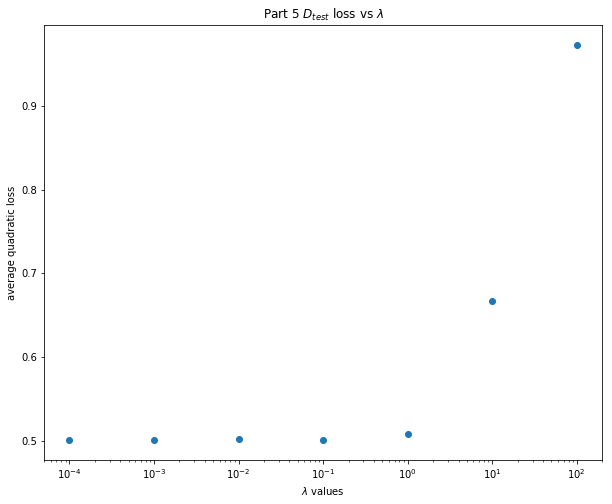

In [5]:
# Plot the error
plt.plot(np.array(lambdaVals),np.array(lossArr), 'o')
plt.xlabel("$\lambda$ values")
plt.xticks(range(len(lambdaVals)), np.array(lambdaVals))
plt.xscale('log')
plt.ylabel("average quadratic loss")
plt.title("Part 5 $D_{test}$ loss vs $\lambda$")
plt.show()

## 6. Nonlinear preprocessing

We set $\lambda = 0.01$ and try fitting different degrees of polynomials.


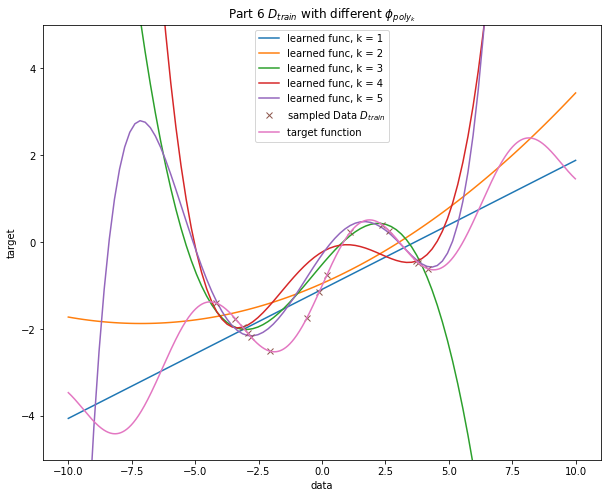

In [6]:
# Define step size and number of steps for each degree
kDegreeArr = [1, 2, 3, 4, 5]


stepsizeArr = [0.01, 0.001, 1.0e-6, 1.0e-7, 1.0e-7]

#stepsizeArr = [0.01, 0.001, 5.5180124e-08, 2.84905965e-07]
#numStepArr = [ int(3.5e6)]

numStepArr = [400, 40000, int(1e6),int(3.5e6), int(3.5e6)]

#numStepArr = [400, 40000, 837605, 292662]

#stepsizeArr = [10**(-7), 10**(-7), 10**(-7), 10**(-7)]
#numStepArr = [10, 10, 10, 10]

plt.rcParams['figure.figsize'] = [10, 8]
plt.ylim(top = 5, bottom=-5)

lossArr_train = []
lossArr_test = []
learned_param = []

np.random.seed(5)

# Function to do a mapping from a 1d X.
def to_map(input_data, k):
    if k == 1: # Do nothing
        return input_data
    to_map = [input_data]
    for i in range(2, k+1):
        raised = np.power(input_data, i)
        to_map.append(raised)
    dataK = np.column_stack(to_map)[0]
    return dataK
    
for k in kDegreeArr:
    #print('On degree {}.'.format(k))
    # Initialize weights and bias randomly according to degree
    weight = np.random.rand(k)
    bias = 0
    
    # Get a mapping of the training data
    dataDM = []
    for data in dataDn[0]:
        dataDM.append(to_map(data, k))
    dataDM = np.array(dataDM)

    # Get a mapping of the dummy data (to make plot smooth)
    dataK = np.array(np.linspace(-10, 10, 100))
    dataKn = [dataK , hX(dataK)]
    dataKM = []
    for data in dataK:
        dataKM.append(to_map(data, k))
    dataKM = np.array(dataKM)
    
    # Do the descent
    regGD = 0
    regGD = gradDescent(weightedDecay = 0.01, 
                        stepSize = stepsizeArr[kDegreeArr.index(k)],
                        numberSteps= numStepArr[kDegreeArr.index(k)])
    regGDParam = regGD.regression_gradient(weight, bias, dataDM, dataDn[1])
    learned_param.append([regGDParam[0], regGDParam[1]])
    
    # Define the function using the learned parameters
    learnedFunc, learnedFunc_plot = [], []
    for i, point in enumerate(dataDM):
        learnedFunc.append(np.dot(regGDParam[0], point) + regGDParam[1])
    learnedFunc = np.array(learnedFunc)
    #print('learned func before sum:', learnedFunc)
    #learnedFunc = np.sum(learnedFunc, axis = 1)
    #print('learned func after sum:', learnedFunc)
    
    # Define a function with dummy data and learned parameters, for a smooth plot
    #dataK = np.array(np.linspace(-10, 10, 100))
    for point in dataKM:
        learnedFunc_plot.append(np.dot(regGDParam[0], point) + regGDParam[1])
    learnedFunc_plot = np.array(learnedFunc_plot)
    #learnedFunc_plot = np.sum(learnedFunc_plot, axis = 1)
    #print(learnedFunc_plot)
    plt.plot(dataK, learnedFunc_plot, label = "learned func, k = {}".format(k)) 
    #plt.scatter(dataDn[0], learnedFunc, label = "learned func, k = {}".format(k)) 
    
    # Calculate training error (for next part)
    loss = np.mean((learnedFunc - dataDn[1])**2)
    lossArr_train.append(loss)

# Do the rest of the plot    
xvals = np.arange(-10, 10, 0.01)    
plt.plot(dataDn[0], dataDn[1], 'x', label="sampled Data $D_{train}$")
#plt.plot(dataDtest[0], dataDtest[1], 'x', label="sampled Data $D_{test}$")

plt.plot(xvals, hX(xvals), label = "target function")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Part 6 $D_{train}$ with different $\phi_{{poly}_k}$")
plt.legend(loc='best')
plt.show()

## 7. Increasing $l$

We plot the the empirical risk (loss on $D_{n}$ and the true risk (loss on $D_{test}$) with increasing $l$

loss train,  [1.5594002405994283, 0.41098508745696705, 0.12423698870208551, 0.34191861271974927, 0.15249103481210471]
loss test ,  [1.7642287771004754, 0.5459207442067957, 0.24366619936079942, 0.4823428315886586, 0.20437045213688168]


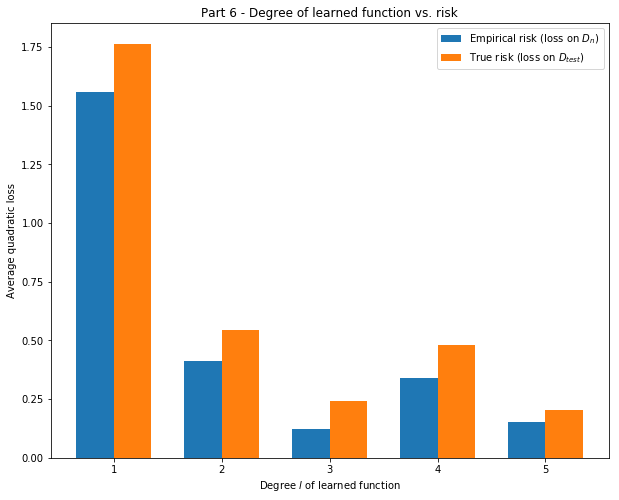

In [7]:
# Already got training loss, so now get testing loss:
lossArr_test = []


for k in kDegreeArr:    
    # Get the function
    dataDtestM = []
    for data in dataDtest[0]:
        dataDtestM.append(to_map(data, k))
    dataDtestM = np.array(dataDtestM)
    
    learnedFunc = []
    for point in dataDtestM:
        #print(learned_param[k-1])
        learnedFunc.append(np.dot(learned_param[k-1][0], point) + learned_param[k-1][1])
        learnedFunc
    learnedFunc = np.array(learnedFunc)
    #if k != 1:
    #    learnedFunc = np.sum(learnedFunc, axis = 1)
    #learnedFunc = np.sum(learnedFunc, axis = 1)

    # Calculate test error
    loss = np.mean((learnedFunc - dataDtest[1])**2)
    lossArr_test.append(loss)

print("loss train, " ,lossArr_train)
print("loss test , ", lossArr_test)
# Plot training and test error
ind = np.arange(len(kDegreeArr))
width = 0.35  

plt.bar(ind, np.array(lossArr_train), width, label="Empirical risk (loss on $D_{n}$)")
plt.bar(ind + width, np.array(lossArr_test), width, label="True risk (loss on $D_{test}$)")
plt.xlabel("Degree $l$ of learned function")
plt.ylabel("Average quadratic loss")
plt.title("Part 6 - Degree of learned function vs. risk")

plt.xticks(ind + width / 2, ('1', '2', '3', '4', '5'))
#plt.yscale('log')
plt.legend(loc='best')
plt.show()

* Generally, as the degree $l$ of the learned function goes up, the empirical risk (loss on $D_{n}$) *should* decrease, while the true risk (loss on $D_{test}$) *should* increase. This is because with increasing degree, the learned function should be able to fit the training data better and better, using its higher capacity to effectively memorize the data. We do not see this exact pattern on our set of learned functions above, for which we offer the following explanation:



- The test data are sample from range $[-5, 5]$ according to the handout, test data and label are gonna be close to training data and it's not reflecting the fact that higher degree polynomials overfit on the range $[-5, 5]$ and then overshoot outside this range. We back this up by plotting true risk using the same learned weight, bias but on test data sampled from $[-10, 10]$ in Appendix A


## Please refer to the plot after Appendix A titled "Appendix A: true risk over $ x \in [-10, 10]$"

* Overall, the empirical risk decreases as we increase polynomial degree. This is expected because a linear function has low capacity/expressitivity, whereas degree 2 to 5 can fit the curvature of $h(x)$


* Overall, the true risk increases as we increase polynomial degree. This is expected because high degree polynomials overfit to the points sample on $[-5, 5]$. The curvatures follow the curvature of $h(x)$ in $x \in [-5, 5]$ but overshoot/undershoot for $x \notin [-5, 5]$ because of the nature of higher degree polynominal functions. Their $y$ values do not oscillate like a sinusoid.


* The test of data generated from the true distribution matches our theory regarding true risk vs empirical risk.






# Appendix A: plot true risk from test data sample $\in [-10, 10]$

loss train  [1.5594002405994283, 0.41098508745696705, 0.12423698870208551, 0.34191861271974927, 0.15249103481210471]
loss test ,  [7.036724594689933, 1.214931163886218, 145.42863047886723, 469.59531429571007, 410.1828530624379]


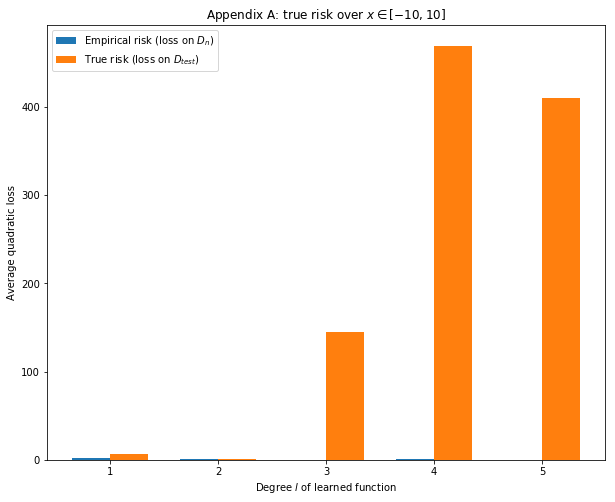

In [8]:
data = np.random.uniform(-10, 10, 100)
target = hX(data)
dataDtest = [data, target]


lossArr_test = []


for k in kDegreeArr:    
    # Get the function
    dataDtestM = []
    for data in dataDtest[0]:
        dataDtestM.append(to_map(data, k))
    dataDtestM = np.array(dataDtestM)
    
    learnedFunc = []
    for point in dataDtestM:
        #print(learned_param[k-1])
        learnedFunc.append(np.dot(learned_param[k-1][0], point) + learned_param[k-1][1])
        learnedFunc
    learnedFunc = np.array(learnedFunc)

    # Calculate test error
    loss = np.mean((learnedFunc - dataDtest[1])**2)
    lossArr_test.append(loss)

print("loss train ", lossArr_train)
print("loss test , ", lossArr_test)
# Plot training and test error
ind = np.arange(len(kDegreeArr))
width = 0.35  

plt.bar(ind, np.array(lossArr_train), width, label="Empirical risk (loss on $D_{n}$)")
plt.bar(ind + width, np.array(lossArr_test), width, label="True risk (loss on $D_{test}$)")
plt.xlabel("Degree $l$ of learned function")
plt.ylabel("Average quadratic loss")
plt.title("Appendix A: true risk over $ x \in [-10, 10]$")

plt.xticks(ind + width / 2, ('1', '2', '3', '4', '5'))
plt.legend(loc='best')
plt.show()

## Appendix B: hyperparameter search
This code block searchs for best hyperparameters by trying 100 random values for step size, number of steps for each of the polynomial pre-processing in degree k = 4 and k =5. If you wish to verify, you may uncomment the lines we indicated below. It takes around 30 Minutes to run on Intel i7 provided that you freeze everything else.

In [9]:
'''
#####################################################
#
#NOTE TO TA: uncomment the line before this block   #
#
######################################################

def testHyperParams(kDegreeArr, stepsizeArr, numStepArr):
    lossArr_train = []    
    for k in kDegreeArr:
        # Initialize weights and bias randomly according to degree
        weight = np.random.rand(k)
        bias = np.random.rand(k)
    
        # Get a mapping of the training data
        dataDM = []
        for data in dataDn[0]:
            dataDM.append(to_map(data, k))
        dataDM = np.array(dataDM)

        # Get a mapping of the dummy data (to make plot smooth)
        dataK = np.array(np.linspace(-5, 5, 100))
        dataKn = [dataK , hX(dataK)]
        dataKM = []
        for data in dataK:
            dataKM.append(to_map(data, k))
        dataKM = np.array(dataKM)
    
    # Do the descent
        regGD = gradDescent(weightedDecay = 0.01, 
                        stepSize = stepsizeArr[kDegreeArr.index(k)],
                        numberSteps= numStepArr[kDegreeArr.index(k)])
        regGDParam = regGD.regression_gradient(weight, bias, dataDM, dataDn[1])
        learned_param.append([regGDParam[0], regGDParam[1]])
    
        # Define the function using the learned parameters
        learnedFunc, learnedFunc_plot = [], []
        for i, point in enumerate(dataDM):
            learnedFunc.append(np.dot(regGDParam[0], point) + regGDParam[1])
        learnedFunc = np.array(learnedFunc)
        learnedFunc = np.sum(learnedFunc, axis = 1)
    
        # Define a function with dummy data and learned parameters, for a smooth plot
        #dataK = np.array(np.linspace(-10, 10, 100))
        for point in dataKM:
            learnedFunc_plot.append(np.dot(regGDParam[0], point) + regGDParam[1])
        learnedFunc_plot = np.array(learnedFunc_plot)
        learnedFunc_plot = np.sum(learnedFunc_plot, axis = 1)
        plt.plot(dataK, learnedFunc_plot, label = "learned func, k = {}".format(k)) 
        #plt.scatter(dataDn[0], learnedFunc, label = "learned func, k = {}".format(k)) 
    
        # Calculate training error (for next part)
        loss = np.mean((learnedFunc - dataDn[1])**2)
        lossArr_train.append(loss)
    
    
    
    # Do the rest of the plot    
    xvals = np.arange(-10, 10, 0.01)    
    plt.plot(dataDn[0], dataDn[1], 'x', label="sampled Data $D_{train}$", color="purple")
    plt.plot(xvals, hX(xvals), label = "target function", color="purple")
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title("Part 6 $D_{train}$ with different $\phi_{{poly}_k}$")
    plt.legend(loc='best')
    plt.show()
    
    lossArr_train = np.array(lossArr_train)
    print("train loss, ", np.sum(lossArr_train))
    return lossArr_train

def dimParamSeach(k, j):
    loss = []
    param = []
    np.random.seed(j)

    # Define step size and number of steps for each degree

    kDegreeArr = [k]
    px = np.random.randint(3, 8)
    stepsizeArr = np.dot(np.power(0.1, px) , np.random.rand(1))
    print("stepsizeArr", stepsizeArr)
    
    num = np.random.randint(3000, 800000)
    numStepArr = [num]
    print("numStepArr", numStepArr)
    param.append((stepsizeArr, num))
    



    l = testHyperParams(kDegreeArr, stepsizeArr, numStepArr)
    loss.append(l)

    print("lowest err params")
    print("loss", loss)
    loss = np.array(loss)
    m = int(np.argmin(loss))
    print(param[m])

highDeg = [4, 5]

for i in highDeg:
    for j in range(0, 100):
        print("================== BEGIN TRIAL {} ========================== \n".format(j))

        dimParamSeach(i, j)
        print("================== END TRIAL {} ========================== \n".format(j))
    print("################# END 4D ######################")
'''

'\n#####################################################\n#\n#NOTE TO TA: uncomment the line before this block   #\n#\n######################################################\n\ndef testHyperParams(kDegreeArr, stepsizeArr, numStepArr):\n    lossArr_train = []    \n    for k in kDegreeArr:\n        # Initialize weights and bias randomly according to degree\n        weight = np.random.rand(k)\n        bias = np.random.rand(k)\n    \n        # Get a mapping of the training data\n        dataDM = []\n        for data in dataDn[0]:\n            dataDM.append(to_map(data, k))\n        dataDM = np.array(dataDM)\n\n        # Get a mapping of the dummy data (to make plot smooth)\n        dataK = np.array(np.linspace(-5, 5, 100))\n        dataKn = [dataK , hX(dataK)]\n        dataKM = []\n        for data in dataK:\n            dataKM.append(to_map(data, k))\n        dataKM = np.array(dataKM)\n    \n    # Do the descent\n        regGD = gradDescent(weightedDecay = 0.01, \n                        